In [265]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm,tree
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
#from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score


In [266]:
# Ignore Warning
warnings.simplefilter(action='ignore', category=FutureWarning)
#read data
df = pd.read_csv("Dataset.csv")
df2 = pd.read_csv("test.csv")
tst = pd.read_csv("sample_submission.csv")

df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Self-emp-not-inc,21472,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,22,United-States
1,32,Private,90969,Assoc-voc,11,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,45,United-States
2,26,Private,149734,HS-grad,9,Separated,Craft-repair,Unmarried,Black,Female,0,1594,40,United-States
3,42,Private,52849,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
4,39,Self-emp-not-inc,106347,Some-college,10,Divorced,Sales,Unmarried,White,Male,0,0,47,United-States


In [267]:
print(df.shape)
print(df2.shape)

(22792, 15)
(9769, 14)


In [268]:
df.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22792 entries, 0 to 22791
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             22792 non-null  int64 
 1   work-class      22792 non-null  object
 2   work-fnl        22792 non-null  int64 
 3   education       22792 non-null  object
 4   education-num   22792 non-null  int64 
 5   marital-status  22792 non-null  object
 6   position        22792 non-null  object
 7   relationship    22792 non-null  object
 8   race            22792 non-null  object
 9   sex             22792 non-null  object
 10  capital-gain    22792 non-null  int64 
 11  capital-loss    22792 non-null  int64 
 12  hours-per-week  22792 non-null  int64 
 13  native-country  22792 non-null  object
 14  salary          22792 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9769 entries, 0 to 9768
Data columns (total

In [269]:
print("train")
print((df==' ?').sum())
print("test")
(df2==' ?').sum()

train
age                  0
work-class        1275
work-fnl             0
education            0
education-num        0
marital-status       0
position          1279
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     409
salary               0
dtype: int64
test


age                 0
workclass         561
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        564
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    174
dtype: int64

<AxesSubplot:xlabel='occupation', ylabel='count'>

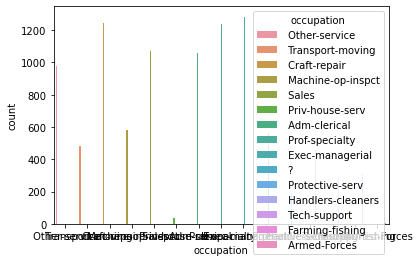

In [270]:
sns.countplot(x = "occupation", hue = "occupation",data=df2)

In [271]:
#df['sex'] = df['sex'].map({'Male': 0,'Female': 1})
df['position'] = df['position'].replace([' ?'], 'Prof-specialty')
df['native-country'] = df['native-country'].replace([' ?'], 'United-States')
df['work-class'] = df['work-class'].replace([' ?'], 'private')

df2['occupation'] = df2['occupation'].replace([' ?'], ' Machine-op-inspct')
df2['native-country'] = df2['native-country'].replace([' ?'], 'United-States')
df2['workclass'] = df2['workclass'].replace([' ?'], 'private')

In [272]:
(df==' ?').sum()

age               0
work-class        0
work-fnl          0
education         0
education-num     0
marital-status    0
position          0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [273]:
df.head(40)

,age,work-class,work-fnl,education,education-num,marital-status,position,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [274]:
print (df2.isnull().sum())  

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64


In [275]:

print (df2.isnull().sum())  

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64


In [276]:
# ww = pd.get_dummies(df, columns=['native-country'], prefix = ['native-country'])
# wwt = pd.get_dummies(df2, columns=['native-country'], prefix = ['native-country'])

# ww.head()

In [277]:
# df = pd.concat([ww, df], axis=1)
# df2 = pd.concat([wwt, df2], axis=1)

# df.head()

In [278]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 

df['work-class']= label.fit_transform(df['work-class']) 
df['marital-status']= label.fit_transform(df['marital-status']) 
df['position']= label.fit_transform(df['position']) 
df['relationship']= label.fit_transform(df['relationship']) 
df['race']= label.fit_transform(df['race']) 
df['sex']= label.fit_transform(df['sex']) 
df['native-country']= label.fit_transform(df['native-country']) 
##################### Test data ################################
df2['workclass']= label.fit_transform(df2['workclass']) 
df2['marital-status']= label.fit_transform(df2['marital-status']) 
df2['occupation']= label.fit_transform(df2['occupation']) 
df2['relationship']= label.fit_transform(df2['relationship']) 
df2['race']= label.fit_transform(df2['race']) 
df2['sex']= label.fit_transform(df2['sex']) 
df2['native-country']= label.fit_transform(df2['native-country']) 
#################################################################
df2.rename(columns = {'workclass':'work-class', 'occupation':'position'}, inplace = True)


In [279]:
df.dtypes


age                int64
work-class         int32
work-fnl           int64
education         object
education-num      int64
marital-status     int32
position           int32
relationship       int32
race               int32
sex                int32
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country     int32
salary            object
dtype: object

In [280]:
df2.head(10)

,age,work-class,fnlwgt,education,education-num,marital-status,position,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,5,21472,Some-college,10,4,7,1,4,0,0,0,22,37
1,32,3,90969,Assoc-voc,11,2,13,0,4,1,0,0,45,37
2,26,3,149734,HS-grad,9,5,2,4,2,0,0,1594,40,37
3,42,3,52849,Some-college,10,2,6,0,4,1,0,0,40,37
4,39,5,106347,Some-college,10,0,11,4,4,1,0,0,47,37
5,48,3,199735,Bachelors,13,0,8,1,4,0,0,0,44,10
6,24,3,488541,Some-college,10,4,7,4,2,0,0,0,35,37
7,46,3,403911,Assoc-voc,11,2,2,0,2,1,0,0,40,37
8,53,3,172991,Some-college,10,2,11,0,4,1,0,0,25,37
9,36,0,210945,Some-college,10,2,0,0,4,1,0,0,70,37


In [281]:
df.head(10)

,age,work-class,work-fnl,education,education-num,marital-status,position,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,6,77516,Bachelors,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,5,83311,Bachelors,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,3,215646,HS-grad,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,3,234721,11th,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,3,338409,Bachelors,13,2,9,5,2,0,0,0,40,4,<=50K
5,37,3,284582,Masters,14,2,3,5,4,0,0,0,40,38,<=50K
6,49,3,160187,9th,5,3,7,1,2,0,0,0,16,22,<=50K
7,52,5,209642,HS-grad,9,2,3,0,4,1,0,0,45,38,>50K
8,31,3,45781,Masters,14,4,9,1,4,0,14084,0,50,38,>50K
9,42,3,159449,Bachelors,13,2,3,0,4,1,5178,0,40,38,>50K


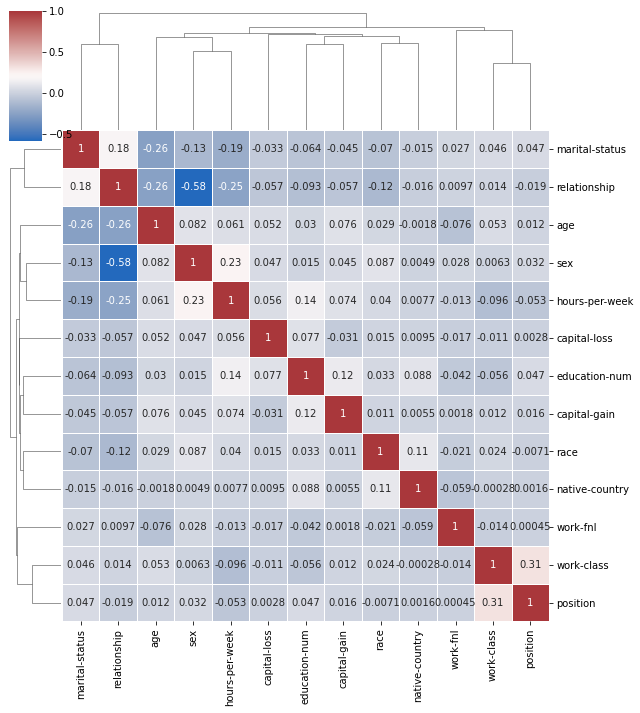

In [282]:
sns.clustermap(df.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

In [283]:
df.drop("work-fnl", axis=1, inplace=True)
df.drop("education", axis=1, inplace=True)
df.drop("race", axis=1, inplace=True)

df.shape
#################### Test data #####################
df2.drop("fnlwgt", axis=1, inplace=True)
df2.drop("education", axis=1, inplace=True)
df2.drop("race", axis=1, inplace=True)


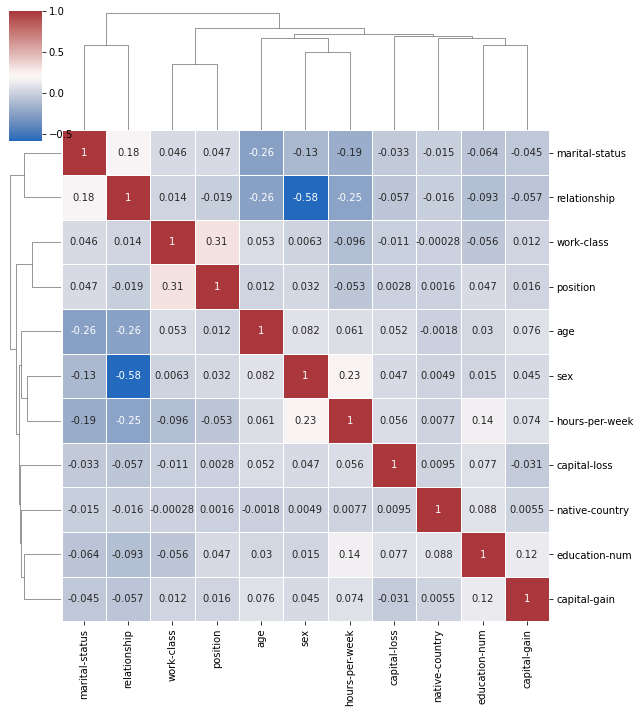

In [284]:
sns.clustermap(df.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

In [285]:
X = df.drop("salary", axis = 1).copy()
y = df["salary"].copy()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
# print("X_train",X_train.shape)
# print("X_test",X_test.shape)
# print("y_train",y_train.shape)
# print("y_test",y_test.shape)

X_train = X
X_test = df2.copy()
y_train = y


In [286]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = df2.columns)


In [287]:
model1 = GaussianNB()
model2 = RandomForestClassifier()
# model3 = svm.SVC()
# model4 = LogisticRegression(solver='liblinear', C=10.0)
model5 = DecisionTreeClassifier()
# model6 = MLPClassifier()
# model7 = tree.DecisionTreeClassifier()


model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
# model3.fit(X_train, y_train)
# model4.fit(X_train,y_train)
model5.fit(X_train, y_train)
# model6.fit(X_train, y_train)
# model7.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)# 80.02%
y_pred2 = model2.predict(X_test)# 98.39%
# y_pred3 = model3.predict(X_test)# 80.29%
# y_pred4 = model4.predict(X_test)# 82.29
y_pred5 = model5.predict(X_test)# 98.39%
# y_pred6 = model6.predict(X_test)# 80%
# y_pred7 = model7.predict(X_test)# 98.39%

In [288]:

acc_decision_tree = round(model1.score(X_train, y_train) * 100, 2)
print(acc_decision_tree)

80.14


In [289]:
# GaussianNB 
# cr=classification_report(y_test, y_pred1)

# print(cr)

# acc = accuracy_score(y_test, y_pred1)

# print(acc)

acc_decision_tree = round(model1.score(X_train, y_train) * 100, 2)
print(acc_decision_tree)

80.14


In [290]:
sub = tst[["index"]]
sub["salary"]= y_pred1
sub.to_csv("GaussianNB model.csv")

In [291]:
# RandomForestClassifier
acc_decision_tree = round(model2.score(X_train, y_train) * 100, 2)
print(acc_decision_tree)

97.73


In [292]:
sub = tst[["index"]]
sub["salary"]= y_pred2
sub.to_csv("random_forest2.csv")

In [293]:
# # svm
# cr=classification_report(y_test, y_pred3)

# print(cr)

# acc = accuracy_score(y_test, y_pred3)

# print(acc)

# acc_decision_tree = round(model3.score(X_train, y_train) * 100, 2)
# print(acc_decision_tree)

In [294]:
# # LogisticRegression

# acc_decision_tree = round(model4.score(X_train, y_train) * 100, 2)
# print(acc_decision_tree)

In [295]:
# sub = tst[["index"]]
# sub["salary"]= y_pred5
# sub.to_csv("DecisionTreeClassifier model.csv")

In [296]:
# DecisionTreeClassifier
acc_decision_tree = round(model5.score(X_train, y_train) * 100, 2)
print(acc_decision_tree)

97.73


In [297]:
sub = tst[["index"]]
sub["salary"]= y_pred5
sub.to_csv("DecisionTreeClassifier model.csv")

In [298]:
# # MLPClassifier 
# cr=classification_report(y_test, y_pred6)

# print(cr)

# acc = accuracy_score(y_test, y_pred6)

# print(acc)

# acc_decision_tree = round(model6.score(X_train, y_train) * 100, 2)
# print(acc_decision_tree)

In [299]:
# cr=classification_report(y_test, y_pred7)

# print(cr)